 Written by Federica B. Bianco @fedhere
 NYU CUSP PUI

 Assignment 1 Homework 4

 This is a skeleton & instruction notebook

-  GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), 
 _all with the same population mean_. Include a _Normal_, a _Poisson_, a _Binomial_, a _Chi-Squared_ distribution, and 1 more of your choice.                                       
-  For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well). 
-  Describe the behavior you see in the plots in terms of the law of large numbers.
-  PLOT the distributions of all sample means (together for all distributions). _Mandatory_: as a histogram. _Optional_: in any other way you think is convincing
 Extra Credit: FIT a gaussian to the distribution of means            

In [1]:
from __future__ import print_function
__author__= 'fbb'

import pylab as pl
# this package sets up pretty plots
import seaborn
from scipy.optimize import curve_fit, minimize
    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## choose which distributions to use 

In [7]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['chisq']


## and which mean to give it

In [8]:
mymean = 100

# Then lets look at the numpy random sampling package to see how I create the distribution
http://docs.scipy.org/doc/numpy/reference/routines.random.html
http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.chisquare.html#numpy.random.chisquare



In [9]:
# the chi sq distribution takes the number of degrees of freedom, which luckily is the same as the mean!
df = mymean

## I am making a dictionary to host the distributions.

that is only one possible option. with a dictionary I can easily inspect the distribution I want by its name: it is a very human friendly data storage. In this example I am only using a single distribution, so for me it is overkill, but if I were doing the whole exercise with 5 or 6 distributions it would be useful!

Lets start by looking at a single chi sq distribution

Text(0.5,0,'x')

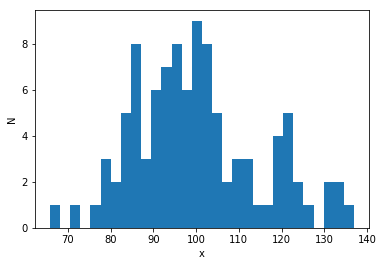

In [11]:
# Note: I am adding imports here, to show the workflow: 
# at this point I realize what packages I need and I import them. 
# but this is a PEP8 violation. 
# It is a good habit to put the includes at the top 
# so the code fails right away if the packages are missing. 
# Otherwise a user may have a piece of code running for a long time, 
# and then fail when the package cannot be imported... 
# (unless they are only imported under conditions, e.g. in an if statement)

import numpy as np
md = {}
# md is an empty disctionary
md['chisq'] = np.random.chisquare(df, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(md['chisq'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

### Figure 1: Chi sq distribution: df = 100, N=100

## let numpy calculate what the mean and stdev of this distribution are

In [12]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 100.02, standard deviation: 14.60


## Now let's do it for 100 Chisq distributions
we want distributions of different sizes (all integers between 10 and 2000)

In [13]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142
  133  125  117  111  105  100   95   90   86   83   80   76   74   71
   68   66   64   62   60   58   57   55   54   52   51   50   48   47
   46   45   44   43   42   41   40   40   39   38   37   37   36   35
   35   34   33   33   32   32   31   31   30   30   29   29   28   28
   28   27   27   27   26   26   25   25   25   25   24   24   24   23
   23   23   22   22   22   22   21   21   21   21   21   20   20   20
   20] (99,)


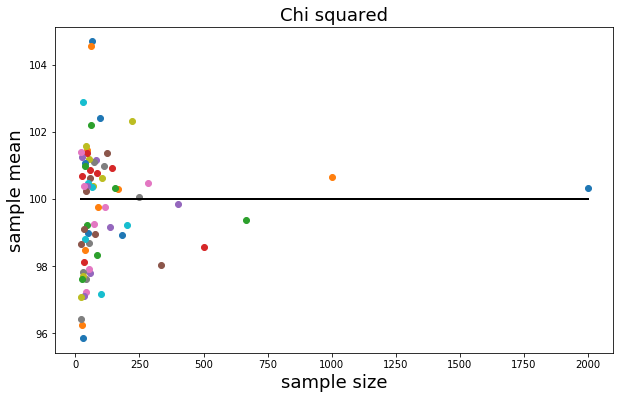

In [14]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['chisq'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

### Figure 2: [describe what you see and how it relates to the law of large numbers]

# now the histogram of the mean of all samples: 
## this requires some data wrangling, since i put the data in a dictionary which is a user friendly data structure, but perhaps not the most machine friendly one

a coder friendly, though not terribly pythonic way to do it is to append each mean in a list in a for loop, and then hist that. be careful: if your data size gets large this becomes a very bad idea!!

Text(0,0.5,'N')

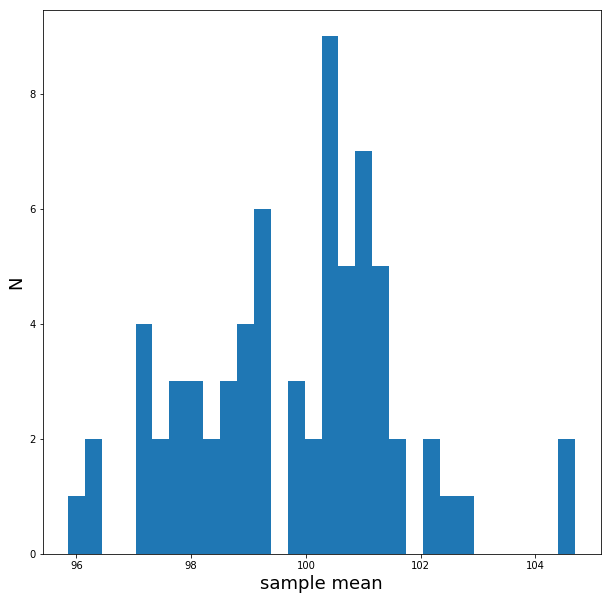

In [15]:
allmeans = list(md['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

## Figure 3: [...]

# Do it for the Normal distribution


In [16]:
# np.random.normal?

Docstring:
normal(loc=0.0, scale=1.0, size=None)

Draw random samples from a normal (Gaussian) distribution.

The probability density function of the normal distribution, first
derived by De Moivre and 200 years later by both Gauss and Laplace
independently [2]_, is often called the bell curve because of
its characteristic shape (see the example below).

The normal distributions occurs often in nature.  For example, it
describes the commonly occurring distribution of samples influenced
by a large number of tiny, random disturbances, each with its own
unique distribution [2]_.

Parameters
----------
loc : float or array_like of floats
    Mean ("centre") of the distribution.
scale : float or array_like of floats
    Standard deviation (spread or "width") of the distribution.
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn.  If size is ``None`` (default),
    a single value is returned if ``loc`

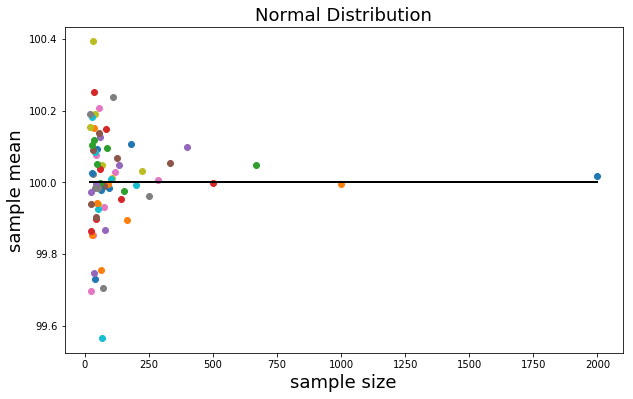

In [35]:
dist='gaus'

mysize = (2000 / (np.array(range(1, 100)))).astype(int)
md[dist] = {} 

for n in mysize:
    md[dist][n] = np.random.normal(df, size = n)
    
md[dist]['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md[dist]:
    if not type(nn) == str:
        md[dist]['means'][nn] = md[dist][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md[dist]['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Normal Distribution', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

Text(0,0.5,'N')

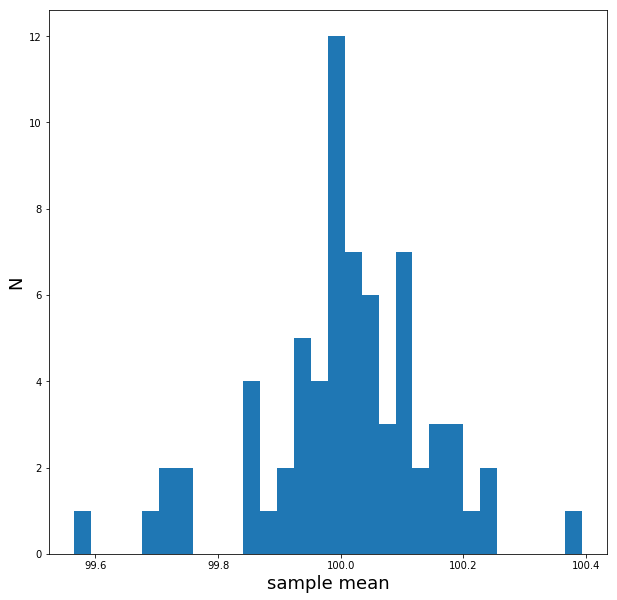

In [36]:
allmeans = list(md[dist]['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

# Do it for the Poisson distribution

In [37]:
# np.random.poisson?

Docstring:
poisson(lam=1.0, size=None)

Draw samples from a Poisson distribution.

The Poisson distribution is the limit of the binomial distribution
for large N.

Parameters
----------
lam : float or array_like of floats
    Expectation of interval, should be >= 0. A sequence of expectation
    intervals must be broadcastable over the requested size.
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn.  If size is ``None`` (default),
    a single value is returned if ``lam`` is a scalar. Otherwise,
    ``np.array(lam).size`` samples are drawn.

Returns
-------
out : ndarray or scalar
    Drawn samples from the parameterized Poisson distribution.

Notes
-----
The Poisson distribution

.. math:: f(k; \lambda)=\frac{\lambda^k e^{-\lambda}}{k!}

For events with an expected separation :math:`\lambda` the Poisson
distribution :math:`f(k; \lambda)` describes the probability of
:math:`k` events occurring

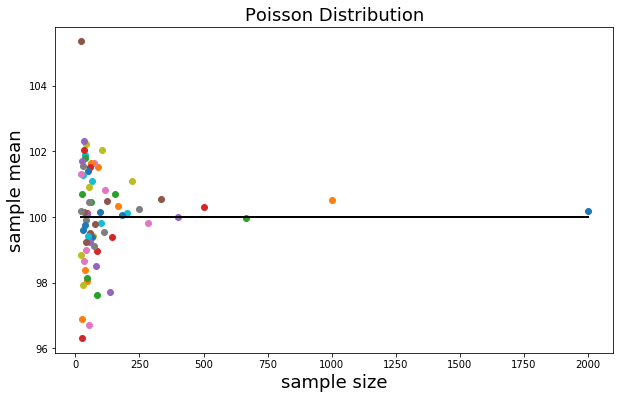

In [42]:
dist='pois'

mysize = (2000 / (np.array(range(1, 100)))).astype(int)
md[dist] = {} 

for n in mysize:
    md[dist][n] = np.random.poisson(df, size = n)
    
md[dist]['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md[dist]:
    if not type(nn) == str:
        md[dist]['means'][nn] = md[dist][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md[dist]['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Poisson Distribution', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

Text(0,0.5,'N')

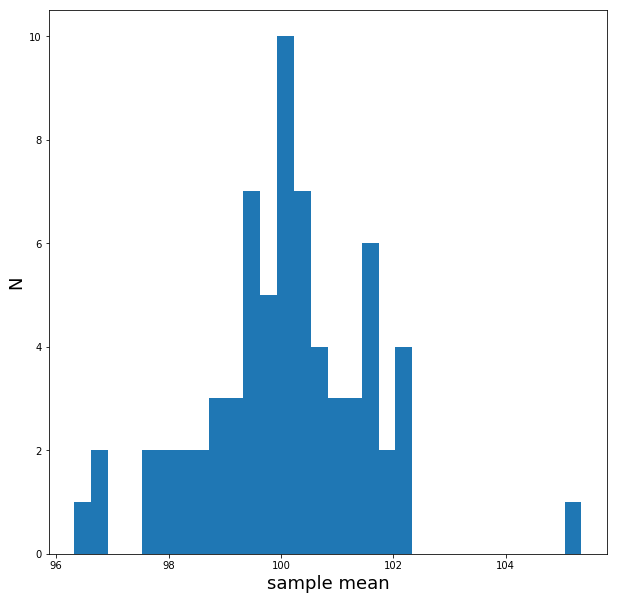

In [43]:
allmeans = list(md[dist]['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

# Do it for the Binomial distribution

In [47]:
# np.random.binomial?

Docstring:
binomial(n, p, size=None)

Draw samples from a binomial distribution.

Samples are drawn from a binomial distribution with specified
parameters, n trials and p probability of success where
n an integer >= 0 and p is in the interval [0,1]. (n may be
input as a float, but it is truncated to an integer in use)

Parameters
----------
n : int or array_like of ints
    Parameter of the distribution, >= 0. Floats are also accepted,
    but they will be truncated to integers.
p : float or array_like of floats
    Parameter of the distribution, >= 0 and <=1.
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn.  If size is ``None`` (default),
    a single value is returned if ``n`` and ``p`` are both scalars.
    Otherwise, ``np.broadcast(n, p).size`` samples are drawn.

Returns
-------
out : ndarray or scalar
    Drawn samples from the parameterized binomial distribution, where
    each sample i

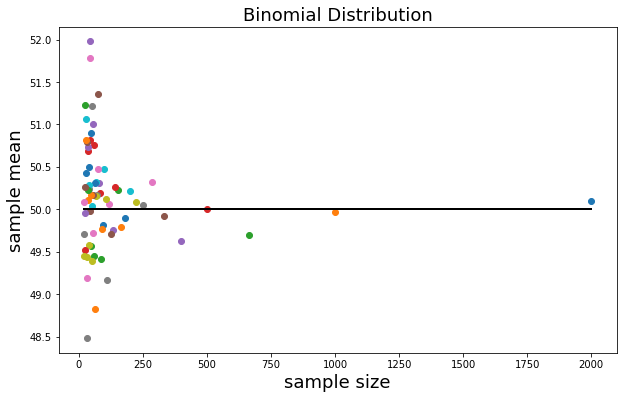

In [49]:
dist='binomial'

mysize = (2000 / (np.array(range(1, 100)))).astype(int)
md[dist] = {} 

for n in mysize:
    md[dist][n] = np.random.binomial(df, 0.5, size = n)
    
md[dist]['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md[dist]:
    if not type(nn) == str:
        md[dist]['means'][nn] = md[dist][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md[dist]['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Binomial Distribution', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [50, 50], 'k')

Text(0,0.5,'N')

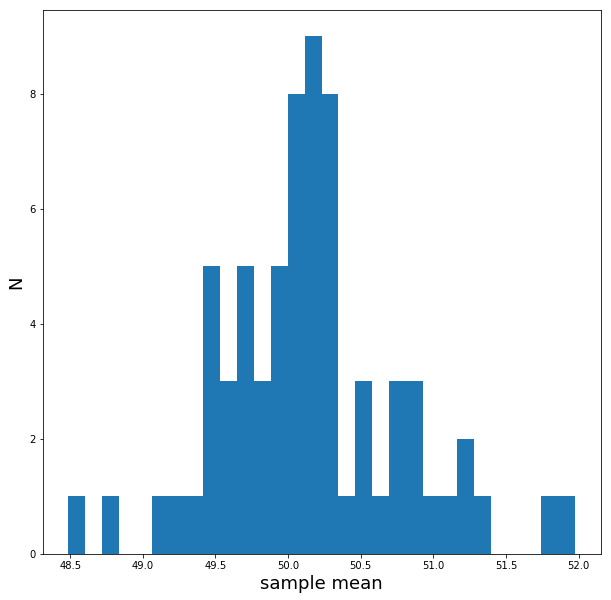

In [50]:
allmeans = list(md[dist]['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

# Do it for another distribution

In [28]:
np.random.lognormal?

Docstring:
lognormal(mean=0.0, sigma=1.0, size=None)

Draw samples from a log-normal distribution.

Draw samples from a log-normal distribution with specified mean,
standard deviation, and array shape.  Note that the mean and standard
deviation are not the values for the distribution itself, but of the
underlying normal distribution it is derived from.

Parameters
----------
mean : float or array_like of floats, optional
    Mean value of the underlying normal distribution. Default is 0.
sigma : float or array_like of floats, optional
    Standard deviation of the underlying normal distribution. Should
    be greater than zero. Default is 1.
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn.  If size is ``None`` (default),
    a single value is returned if ``mean`` and ``sigma`` are both scalars.
    Otherwise, ``np.broadcast(mean, sigma).size`` samples are drawn.

Returns
-------
out : ndarray 

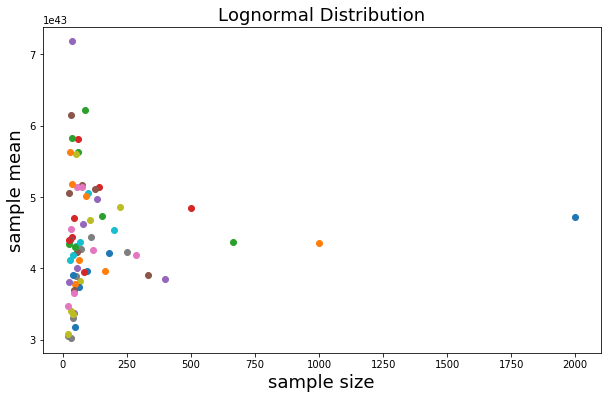

In [62]:
import math
d=math.log(df)
dist='lnormal'

mysize = (2000 / (np.array(range(1, 100)))).astype(int)
md[dist] = {} 

for n in mysize:
    md[dist][n] = np.random.lognormal(df, size = n)
    
md[dist]['means'] = {}
ax_plot = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md[dist]:
    if not type(nn) == str:
        md[dist]['means'][nn] = md[dist][nn].mean()
        #and plot it
        ax_plot.plot(nn, md[dist]['means'][nn], 'o')
        ax_plot.set_xlabel('sample size', fontsize=18)
        ax_plot.set_ylabel('sample mean', fontsize=18)
        ax_plot.set_title('Lognormal Distribution', fontsize=18)
#         ax_plot.plot([min(mysize), max(mysize)], [d, d], 'k')

Text(0,0.5,'N')

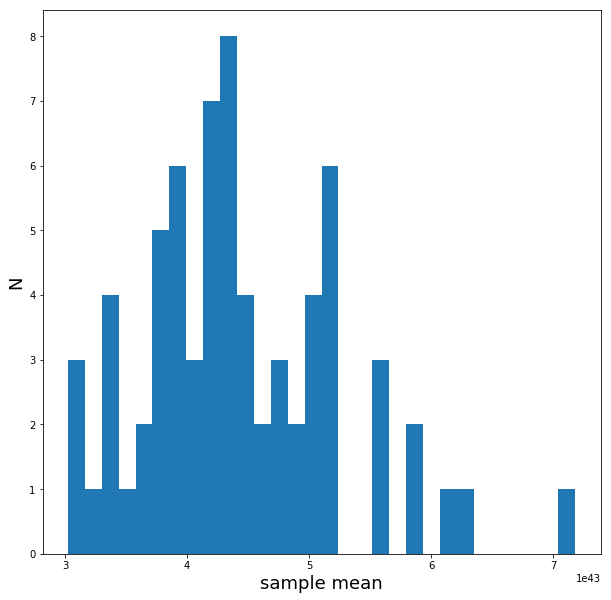

In [63]:
allmeans = list(md[dist]['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)